In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
adult = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                    names = ['age', 'workclass','fnlwgt', 'education', 'education_num','marital_status', 
                    'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 
                    'hours_per_week', 'native_country','label'])

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
print("Shape of data: {}".format(adult.shape))

Shape of data: (32561, 15)


In [7]:
adult['label'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'label'],
      dtype='object')

In [10]:
adult['label_50'] = np.where(adult['label']==' <=50K',0,1)

In [14]:
print("label values count after replacement\n{}".format(adult['label_50'].value_counts()))

label values count after replacement
0    24720
1     7841
Name: label_50, dtype: int64


In [34]:
pt = adult.pivot_table(index='occupation',columns='sex',values='capital_gain',aggfunc='sum')

In [33]:
pt

sex,Female,Male
occupation,,
?,284016.0,830061.0
Adm-clerical,1280580.0,589170.0
Armed-Forces,NaN,0.0
Craft-repair,168021.0,2494332.0
Exec-managerial,1174675.0,8025760.0
Farming-fishing,67237.0,518951.0
Handlers-cleaners,22259.0,330616.0
Machine-op-inspct,94731.0,563305.0
Other-service,278380.0,351959.0


In [37]:
sample = adult.pivot_table(index='marital_status',columns='sex',values='capital_loss',aggfunc='sum')

In [39]:
sample.index

Index([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed'],
      dtype='object', name='marital_status')

In [40]:
sample.columns

Index([' Female', ' Male'], dtype='object', name='sex')

In [41]:
sample

sex,Female,Male
marital_status,,
Divorced,136041,150980
Married-AF-spouse,0,0
Married-civ-spouse,190861,1642787
Married-spouse-absent,10125,14027
Never-married,237015,322192
Separated,23315,36248
Widowed,61695,17414


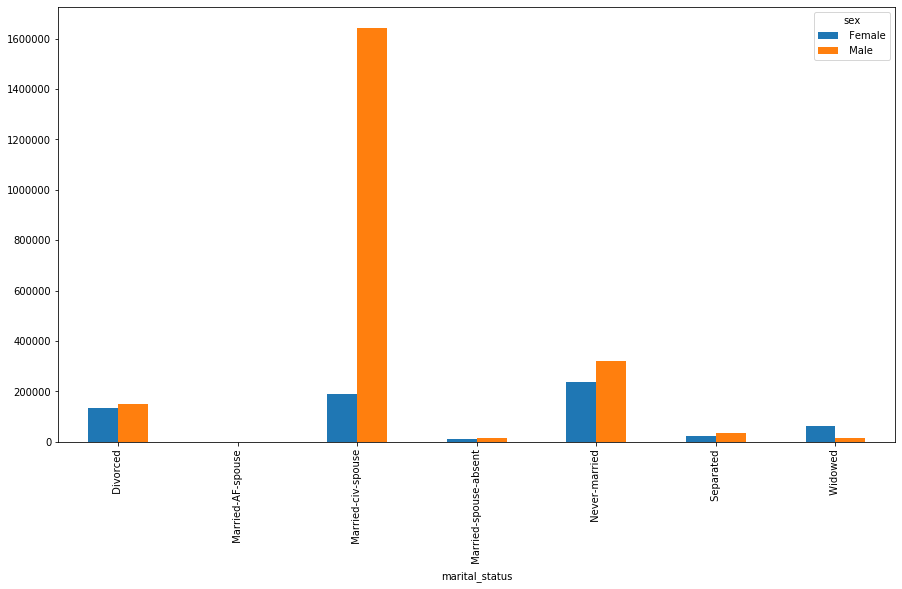

In [42]:
sample.plot(kind='bar',figsize=(15,8))

In [43]:
sample = adult.pivot_table(index='marital_status',columns='sex')

In [44]:
sample

age            capital_gain               \
sex                        Female       Male       Female         Male   
marital_status                                                           
 Divorced               43.275823  42.688312   446.004491  1154.501976   
 Married-AF-spouse      33.142857  31.444444   189.500000   810.888889   
 Married-civ-spouse     39.543754  43.708387  1609.755582  1784.155792   
 Married-spouse-absent  39.551220  41.568075   360.785366   936.169014   
 Never-married          28.126914  28.170385   328.202853   415.576403   
 Separated              39.599049  38.961929   346.366086   838.581218   
 Widowed                58.427879  61.666667   489.147879   973.375000   

                       capital_loss             education_num             \
sex                          Female        Male        Female       Male   
marital_status                                                             
 Divorced                 50.913548   85.251270     10.070359   9.970073   
 Married-AF-spouse         0.000000    0.000000     10.142857  10.222222   
 Married-civ-spouse      115.184671  123.341617     10.378998  10.313387   
 Married-spouse-absent    49.390244   65.854460      9.751220   8.882629   
 Never-married            49.719950   54.461122     10.181246   9.786173   
 Separated                36.949287   92.000000      9.212361   9.423858   
 Widowed                  74.781818  103.654762      9.092121   9.101190   

                               fnlwgt                hours_per_week  \
sex                            Female           Male         Female   
marital_status                                                        
 Divorced               183433.803892  189377.003953      39.578967   
 Married-AF-spouse      224457.000000  131712.222222      31.214286   
 Married-civ-spouse     181772.649366  187384.037615      36.732649   
 Married-spouse-absent  175781.160976  209850.319249      37.078049   
 Never-married          188493.738829  200934.793272      35.010489   
 Separated              201534.133122  214308.111675      37.702060   
 Widowed                175085.923636  169607.392857      32.523636   

                                   label_50            
sex                          Male    Female      Male  
marital_status                                         
 Divorced               43.762846  0.066991  0.160361  
 Married-AF-spouse      56.555556  0.428571  0.444444  
 Married-civ-spouse     44.100008  0.455039  0.445829  
 Married-spouse-absent  42.164319  0.053659  0.107981  
 Never-married          38.494760  0.034823  0.054936  
 Separated              41.862944  0.026941  0.124365  
 Widowed                35.220238  0.055758  0.232143

In [46]:
sample = adult.pivot_table(index='marital_status',columns='sex',values=['capital_gain','capital_loss'])

In [47]:
sample

capital_gain              capital_loss            
sex                          Female         Male       Female        Male
marital_status                                                           
 Divorced                446.004491  1154.501976    50.913548   85.251270
 Married-AF-spouse       189.500000   810.888889     0.000000    0.000000
 Married-civ-spouse     1609.755582  1784.155792   115.184671  123.341617
 Married-spouse-absent   360.785366   936.169014    49.390244   65.854460
 Never-married           328.202853   415.576403    49.719950   54.461122
 Separated               346.366086   838.581218    36.949287   92.000000
 Widowed                 489.147879   973.375000    74.781818  103.654762

In [57]:
pt = adult.pivot_table(index='occupation',columns=['marital_status','sex'],values='label_50',aggfunc='sum')

In [58]:
pt.head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

In [59]:
fpt = adult.pivot_table(index='occupation',columns=['sex','marital_status'],values='label_50',aggfunc='sum')

In [60]:
fpt.head()

sex                 Female                                         \
marital_status    Divorced  Married-AF-spouse  Married-civ-spouse   
occupation                                                          
 ?                     4.0                0.0                42.0   
 Adm-clerical         15.0                1.0               171.0   
 Armed-Forces          NaN                NaN                 NaN   
 Craft-repair          7.0                1.0                10.0   
 Exec-managerial      66.0                1.0               155.0   

sex                                                                         \
marital_status    Married-spouse-absent  Never-married  Separated  Widowed   
occupation                                                                   
 ?                                  0.0            2.0        0.0      4.0   
 Adm-clerical                       1.0           17.0        1.0      6.0   
 Armed-Forces                       NaN            NaN        NaN      NaN   
 Craft-repair                       0.0            2.0        0.0      0.0   
 Exec-managerial                    3.0           42.0        3.0     10.0   

sex                   Male                                         \
marital_status    Divorced  Married-AF-spouse  Married-civ-spouse   
occupation                                                          
 ?                     2.0                NaN               129.0   
 Adm-clerical         11.0                0.0               264.0   
 Armed-Forces          NaN                NaN                 1.0   
 Craft-repair         38.0                1.0               823.0   
 Exec-managerial      77.0                NaN              1511.0   

sex                                                                         
marital_status    Married-spouse-absent  Never-married  Separated  Widowed  
occupation                                                                  
 ?                                  1.0            7.0        0.0      0.0  
 Adm-clerical                       1.0           16.0        2.0      1.0  
 Armed-Forces                       NaN            0.0        NaN      NaN  
 Craft-repair                       4.0           33.0        6.0      4.0  
 Exec-managerial                    5.0           70.0       16.0      9.0

In [61]:
pt_copy = pt.copy()

In [64]:
# MultiIndex columns can be reduced while we rename our columns
pt_copy.columns = pt_copy.columns.map('_'.join)

In [65]:
pt_copy.head()

,Divorced_ Female,Divorced_ Male,Married-AF-spouse_ Female,Married-AF-spouse_ Male,Married-civ-spouse_ Female,Married-civ-spouse_ Male,Married-spouse-absent_ Female,Married-spouse-absent_ Male,Never-married_ Female,Never-married_ Male,Separated_ Female,Separated_ Male,Widowed_ Female,Widowed_ Male
occupation,,,,,,,,,,,,,,
?,4.0,2.0,0.0,NaN,42.0,129.0,0.0,1.0,2.0,7.0,0.0,0.0,4.0,0.0
Adm-clerical,15.0,11.0,1.0,0.0,171.0,264.0,1.0,1.0,17.0,16.0,1.0,2.0,6.0,1.0
Armed-Forces,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Craft-repair,7.0,38.0,1.0,1.0,10.0,823.0,0.0,4.0,2.0,33.0,0.0,6.0,0.0,4.0
Exec-managerial,66.0,77.0,1.0,NaN,155.0,1511.0,3.0,5.0,42.0,70.0,3.0,16.0,10.0,9.0


In [67]:
pt_copy.columns

Index([' Divorced_ Female', ' Divorced_ Male', ' Married-AF-spouse_ Female',
       ' Married-AF-spouse_ Male', ' Married-civ-spouse_ Female',
       ' Married-civ-spouse_ Male', ' Married-spouse-absent_ Female',
       ' Married-spouse-absent_ Male', ' Never-married_ Female',
       ' Never-married_ Male', ' Separated_ Female', ' Separated_ Male',
       ' Widowed_ Female', ' Widowed_ Male'],
      dtype='object')

In [72]:
pd.crosstab(index=adult['education'],columns=adult.sex)

sex,Female,Male
education,,
10th,295,638
11th,432,743
12th,144,289
1st-4th,46,122
5th-6th,84,249
7th-8th,160,486
9th,144,370
Assoc-acdm,421,646
Assoc-voc,500,882


In [71]:
adult.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

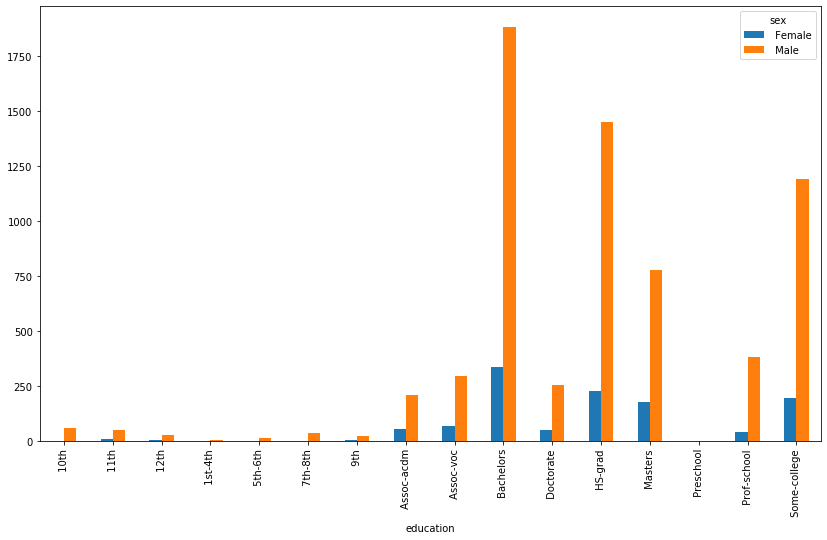

In [75]:
pd.crosstab(index=adult['education'],columns=adult.sex,values=adult.label_50,aggfunc='sum').plot(kind='bar',figsize=(14,8))

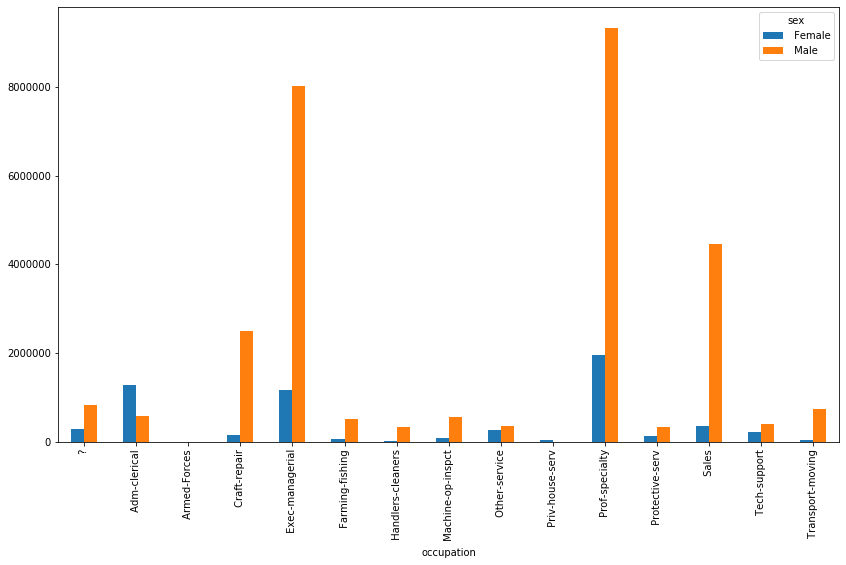

In [76]:
pt = adult.pivot_table(index='occupation',columns='sex',values='capital_gain',aggfunc='sum').plot(kind='bar',figsize=(14,8))

In [81]:
pd.crosstab(adult['education'],adult.sex,adult.label_50,aggfunc='sum')

sex,Female,Male
education,,
10th,3,59
11th,8,52
12th,4,29
1st-4th,0,6
5th-6th,2,14
7th-8th,1,39
9th,5,22
Assoc-acdm,56,209
Assoc-voc,67,294


In [83]:
pt = adult.pivot_table(index='occupation',columns=['marital_status','sex'],values='label_50',aggfunc='sum')

In [85]:
pt.head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

In [87]:
pt.stack()

marital_status               Divorced   Married-AF-spouse  \
occupation         sex                                      
 ?                  Female        4.0                 0.0   
                    Male          2.0                 NaN   
 Adm-clerical       Female       15.0                 1.0   
                    Male         11.0                 0.0   
 Armed-Forces       Male          NaN                 NaN   
 Craft-repair       Female        7.0                 1.0   
                    Male         38.0                 1.0   
 Exec-managerial    Female       66.0                 1.0   
                    Male         77.0                 NaN   
 Farming-fishing    Female        1.0                 NaN   
                    Male          4.0                 1.0   
 Handlers-cleaners  Female        0.0                 NaN   
                    Male          4.0                 NaN   
 Machine-op-inspct  Female        1.0                 NaN   
                    Male          3.0                 NaN   
 Other-service      Female        6.0                 2.0   
                    Male          5.0                 NaN   
 Priv-house-serv    Female        0.0                 NaN   
                    Male          NaN                 NaN   
 Prof-specialty     Female       57.0                 1.0   
                    Male         63.0                 2.0   
 Protective-serv    Female        2.0                 NaN   
                    Male         11.0                 0.0   
 Sales              Female       15.0                 0.0   
                    Male         40.0                 0.0   
 Tech-support       Female        4.0                 NaN   
                    Male         13.0                 NaN   
 Transport-moving   Female        1.0                 NaN   
                    Male         13.0                 0.0   

marital_status               Married-civ-spouse   Married-spouse-absent  \
occupation         sex                                                    
 ?                  Female                 42.0                     0.0   
                    Male                  129.0                     1.0   
 Adm-clerical       Female                171.0                     1.0   
                    Male                  264.0                     1.0   
 Armed-Forces       Male                    1.0                     NaN   
 Craft-repair       Female                 10.0                     0.0   
                    Male                  823.0                     4.0   
 Exec-managerial    Female                155.0                     3.0   
                    Male                 1511.0                     5.0   
 Farming-fishing    Female                  0.0                     1.0   
                    Male                  101.0                     0.0   
 Handlers-cleaners  Female                  4.0                     0.0   
                    Male                   75.0                     0.0   
 Machine-op-inspct  Female                 17.0                     0.0   
                    Male                  222.0                     1.0   
 Other-service      Female                 32.0                     1.0   
                    Male                   72.0                     1.0   
 Priv-house-serv    Female                  0.0                     0.0   
                    Male                    0.0                     NaN   
 Prof-specialty     Female                231.0                     3.0   
                    Male                 1276.0                     8.0   
 Protective-serv    Female                  2.0                     0.0   
                    Male                  179.0                     0.0   
 Sales              Female                 50.0                     2.0   
                    Male                  790.0                     1.0   
 Tech-support       Female                 33.0                     0.0   
        

In [88]:
pt.stack(level=0)

sex                                        Female   Male
occupation        marital_status                        
 ?                 Divorced                   4.0    2.0
                   Married-AF-spouse          0.0    NaN
                   Married-civ-spouse        42.0  129.0
                   Married-spouse-absent      0.0    1.0
                   Never-married              2.0    7.0
...                                           ...    ...
 Transport-moving  Married-civ-spouse         7.0  284.0
                   Married-spouse-absent      0.0    1.0
                   Never-married              1.0    8.0
                   Separated                  0.0    3.0
                   Widowed                    0.0    2.0

[96 rows x 2 columns]

In [90]:
pt.stack().unstack()

marital_status      Divorced        Married-AF-spouse        \
sex                   Female  Male             Female  Male   
occupation                                                    
 ?                       4.0   2.0                0.0   NaN   
 Adm-clerical           15.0  11.0                1.0   0.0   
 Armed-Forces            NaN   NaN                NaN   NaN   
 Craft-repair            7.0  38.0                1.0   1.0   
 Exec-managerial        66.0  77.0                1.0   NaN   
 Farming-fishing         1.0   4.0                NaN   1.0   
 Handlers-cleaners       0.0   4.0                NaN   NaN   
 Machine-op-inspct       1.0   3.0                NaN   NaN   
 Other-service           6.0   5.0                2.0   NaN   
 Priv-house-serv         0.0   NaN                NaN   NaN   
 Prof-specialty         57.0  63.0                1.0   2.0   
 Protective-serv         2.0  11.0                NaN   0.0   
 Sales                  15.0  40.0                0.0   0.0   
 Tech-support            4.0  13.0                NaN   NaN   
 Transport-moving        1.0  13.0                NaN   0.0   

marital_status      Married-civ-spouse          Married-spouse-absent        \
sex                             Female    Male                 Female  Male   
occupation                                                                    
 ?                                42.0   129.0                    0.0   1.0   
 Adm-clerical                    171.0   264.0                    1.0   1.0   
 Armed-Forces                      NaN     1.0                    NaN   NaN   
 Craft-repair                     10.0   823.0                    0.0   4.0   
 Exec-managerial                 155.0  1511.0                    3.0   5.0   
 Farming-fishing                   0.0   101.0                    1.0   0.0   
 Handlers-cleaners                 4.0    75.0                    0.0   0.0   
 Machine-op-inspct                17.0   222.0                    0.0   1.0   
 Other-service                    32.0    72.0                    1.0   1.0   
 Priv-house-serv                   0.0     0.0                    0.0   NaN   
 Prof-specialty                  231.0  1276.0                    3.0   8.0   
 Protective-serv                   2.0   179.0                    0.0   0.0   
 Sales                            50.0   790.0                    2.0   1.0   
 Tech-support                     33.0   211.0                    0.0   0.0   
 Transport-moving                  7.0   284.0                    0.0   1.0   

marital_status      Never-married         Separated        Widowed        
sex                        Female   Male     Female  Male   Female  Male  
occupation                                                                
 ?                            2.0    7.0        0.0   0.0      4.0   0.0  
 Adm-clerical                17.0   16.0        1.0   2.0      6.0   1.0  
 Armed-Forces                 NaN    0.0        NaN   NaN      NaN   NaN  
 Craft-repair                 2.0   33.0        0.0   6.0      0.0   4.0  
 Exec-managerial             42.0   70.0        3.0  16.0     10.0   9.0  
 Farming-fishing              0.0    5.0        0.0   1.0      0.0   1.0  
 Handlers-cleaners            0.0    2.0        0.0   0.0      0.0   1.0  
 Machine-op-inspct            2.0    3.0        0.0   1.0      0.0   0.0  
 Other-service                5.0    7.0        1.0   1.0      4.0   0.0  
 Priv-house-serv              0.0    0.0        0.0   NaN      1.0   NaN  
 Prof-specialty              72.0  105.0       11.0  11.0     10.0   9.0  
 Protective-serv              6.0    9.0        0.0   1.0      0.0   1.0  
 Sales                       10.0   50.0        1.0   4.0     10.0  10.0  
 Tech-support                 7.0   10.0        0.0   3.0      1.0   1.0  
 Transport-moving             1.0    8.0        0.0   3.0      0.0   2.0

In [92]:
pd.crosstab(adult['education'],adult.sex,margins=True)

sex,Female,Male,All
education,,,
10th,295,638,933
11th,432,743,1175
12th,144,289,433
1st-4th,46,122,168
5th-6th,84,249,333
7th-8th,160,486,646
9th,144,370,514
Assoc-acdm,421,646,1067
Assoc-voc,500,882,1382


In [94]:
pd.pivot_table(adult['education'],adult.sex)

KeyError: ' Male'

# Numpy

In [95]:
# Numpy is a Linear algebra library for python, the reason it is so important for data Science with Python is that almost
# all of the libraries in the PyData Ecosystem rely on NumPy as one of their main building blocks

In [96]:
# Numpy is also incredibly fast,as it has binding to c libraries 

In [97]:
import numpy as np

## Numpy Arrays

In [98]:
# Numpy arrays essentially come in two-flavours: vectors and matrices
# Vectors are srictly 1-d arrays and matrices are 2-d arrays

In [99]:
my_list = [1,2,3]

In [100]:
my_list

[1, 2, 3]

In [101]:
np.array(my_list)

array([1, 2, 3])

In [102]:
my_matrix = [[1,2,3],[4,5,6],[7,8,9]]
my_matrix

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [103]:
np.array(my_matrix)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# Built-in Methods

#### arange

In [104]:
# Returns evenly spaced values within a given interval

In [105]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [106]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [107]:
np.zeros(3)

array([0., 0., 0.])

In [108]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [109]:
np.ones(3)

array([1., 1., 1.])

In [111]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### linspace

In [112]:
# Returns evenly spaced numbers over a specified interval

In [113]:
np.linspace(0,10,3)

array([ 0.,  5., 10.])

In [115]:
np.linspace(0,10,5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

#### eye

In [116]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### rand

In [117]:
# Create an array of the given shape and populate it with random samples from a uniform distribution over [0,1]

In [122]:
np.random.rand(10)

array([0.59918764, 0.41317507, 0.51023218, 0.89425818, 0.46881464,
       0.24694179, 0.82707013, 0.79100209, 0.84795948, 0.04098846])

In [123]:
np.random.rand(5,5)

array([[0.18558968, 0.92036683, 0.783311  , 0.25581293, 0.65463073],
       [0.32254065, 0.96676241, 0.6669221 , 0.71297265, 0.47942879],
       [0.34036509, 0.02640366, 0.07438825, 0.03168515, 0.2984987 ],
       [0.37248398, 0.93077806, 0.56615621, 0.74814334, 0.66650042],
       [0.69232645, 0.85535218, 0.33436664, 0.72528578, 0.42347758]])

In [125]:
np.random.randint(1,100)

3

In [126]:
np.random.randint(1,100,10)

array([22, 90, 31, 47, 83, 27, 85, 94, 29, 91])